In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [3]:
def normalize(df):
    result = df.copy()
    for feature_name in ['close','change','polarity']:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [4]:
tweets = pd.read_csv('Sentiment.csv')
tweets['date'], tweets['time'] = tweets['timestamp'].str.split('T', 1).str

tweets.head()

,polarity,timestamp,date,time
0,0.00,2017-01-01T22:41:43,2017-01-01,22:41:43
1,0.00,2017-01-01T23:52:24,2017-01-01,23:52:24
2,-0.15,2017-01-01T22:00:02,2017-01-01,22:00:02
3,0.00,2017-01-01T23:45:35,2017-01-01,23:45:35
4,0.00,2017-01-01T22:51:28,2017-01-01,22:51:28


In [5]:
BTC_price = pd.read_csv('bitcoin_market_price_2017.csv')
BTC_price.head()

,date,close,change
0,2017-01-01,997.69,29.46
1,2017-01-02,1018.05,20.36
2,2017-01-03,1030.82,12.77
3,2017-01-04,1129.87,99.05
4,2017-01-05,1005.81,-124.06


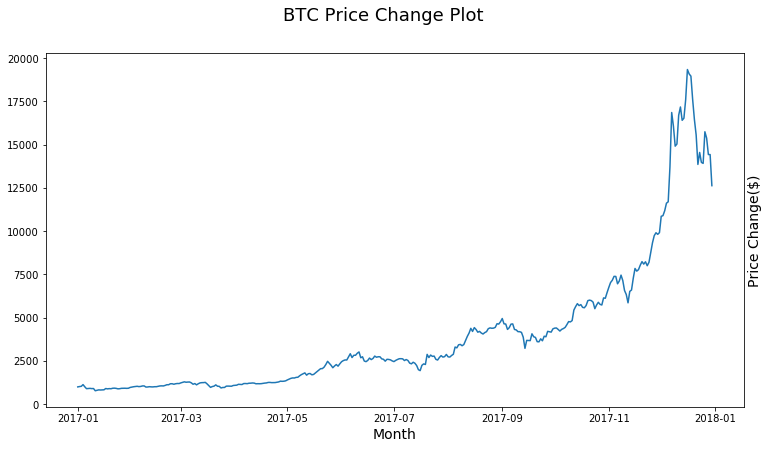

In [15]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12.5, 6.5)
fig.set_tight_layout(False)
x = pd.to_datetime(BTC_price['date'])
y1 = BTC_price['close']
ax1.plot(x, y1)
fig.suptitle('BTC Price Change Plot', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price Change($)', fontsize=14)
ax1.yaxis.set_label_position("right")

In [7]:
groups = tweets.groupby('date', as_index=False)['polarity'].mean()
groups.head()

,date,polarity
0,2017-01-01,0.141754
1,2017-01-02,0.103416
2,2017-01-03,0.129445
3,2017-01-04,0.081961
4,2017-01-05,0.099387


In [8]:
data_merged = pd.merge(BTC_price, groups, on="date")
data_merged.head()

,date,close,change,polarity
0,2017-01-01,997.69,29.46,0.141754
1,2017-01-02,1018.05,20.36,0.103416
2,2017-01-03,1030.82,12.77,0.129445
3,2017-01-04,1129.87,99.05,0.081961
4,2017-01-05,1005.81,-124.06,0.099387


In [9]:
data_merged_norm = normalize(data_merged)
data_merged_norm.head()

,date,close,change,polarity
0,2017-01-01,0.011941,0.369413,0.898745
1,2017-01-02,0.013038,0.367574,0.574263
2,2017-01-03,0.013725,0.366039,0.794563
3,2017-01-04,0.019060,0.383480,0.392677
4,2017-01-05,0.012378,0.338381,0.540163


In [10]:
correlation_change_polarity = data_merged['change'].corr(data_merged['polarity'])
print(correlation_change_polarity)

-0.0324449669515


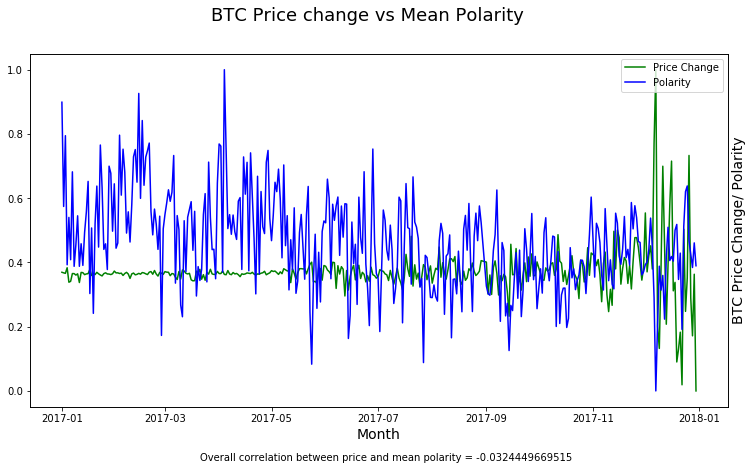

In [31]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12.5, 6.5)
fig.set_tight_layout(False)

x = pd.to_datetime(data_merged_norm['date'])
y1 = data_merged_norm['change']
y2 = data_merged_norm['polarity']

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', label='Price Change')
ax2.plot(x, y2, 'b-', label='Polarity')
fig.suptitle('BTC Price change vs Mean Polarity', fontsize=18)
#plt.xlabel('Date', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)
ax2.set_ylabel('BTC Price Change/ Polarity', fontsize=14)
ax2.yaxis.set_major_locator(plt.NullLocator())

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.figtext(0.52, 0.01, 'Overall correlation between price and mean polarity = -0.0324449669515', horizontalalignment='center') 

In [32]:
fig.savefig("Correlation.pdf")